In [19]:
#simon-periodicity-algorithm
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Operator, Statevector
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram


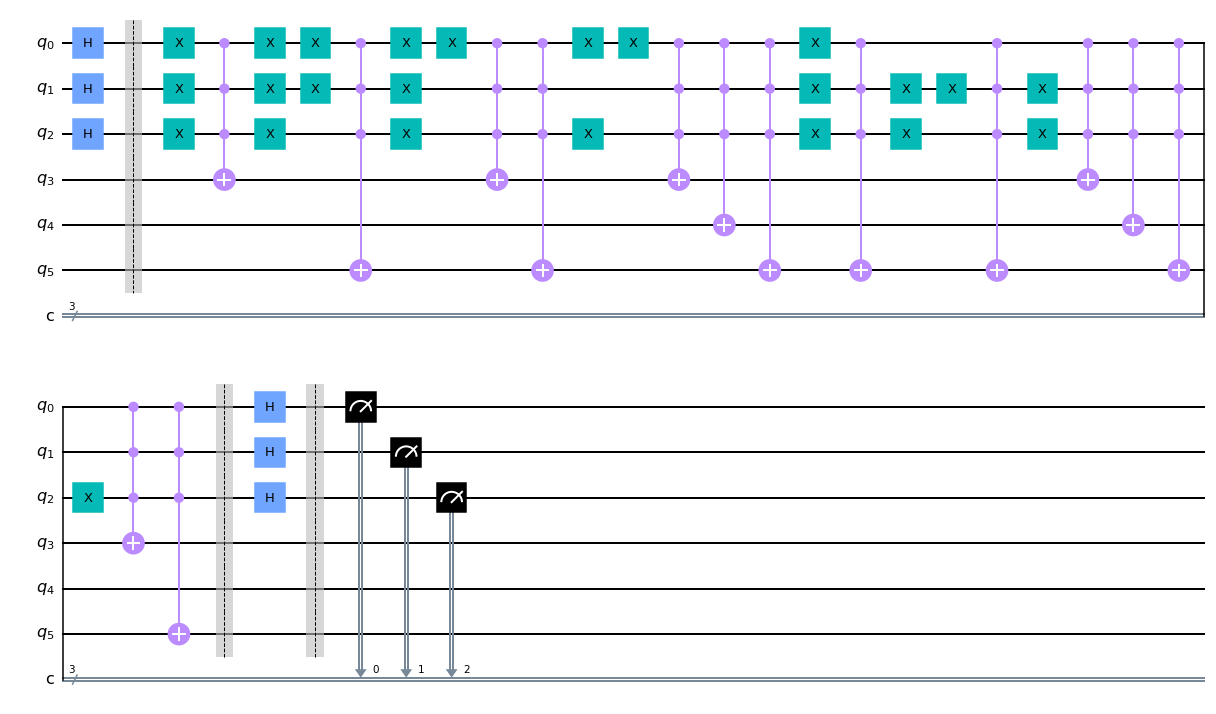

In [55]:
#period: c = 101
#measured qubit: 000, 010, 101, 111
qc = QuantumCircuit(6, 3)

qc.h(range(3))
qc.barrier()
qc.x(range(3))
qc.mcx([0,1,2],3)
qc.x(range(3))

qc.x(range(2))
qc.mcx([0,1,2],5)
qc.x(range(2))

qc.x([0,2])
qc.mcx([0,1,2],3)
qc.mcx([0,1,2],5)
qc.x([0,2])

qc.x(0)
qc.mcx([0,1,2],3)
qc.mcx([0,1,2],4)
qc.mcx([0,1,2],5)
qc.x(0)

qc.x([1,2])
qc.mcx([0,1,2],5)
qc.x([1,2])

qc.x(1)
qc.mcx([0,1,2],5)
qc.x(1)

qc.x(2)
qc.mcx([0,1,2],3)
qc.mcx([0,1,2],4)
qc.mcx([0,1,2],5)
qc.x(2)

qc.mcx([0,1,2],3)
qc.mcx([0,1,2],5)

qc.barrier()
qc.h(range(3))

qc.barrier()
qc.measure(range(3),range(3))
qc.draw('mpl')

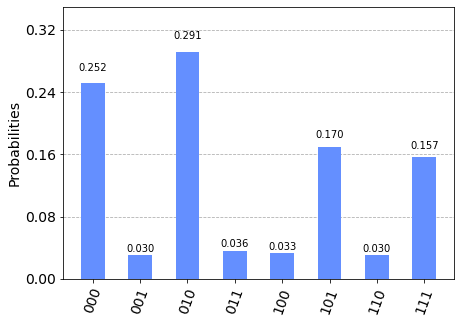

In [57]:
backend = QasmSimulator()
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)